### We will explore the titanic data. We will be working more on the data procssing side where will use panda and numpy modules 


In [142]:
###### Import modules #####
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


### Import titanic data using pandas and take alook at the structure of the data for getting familiar with Panda 

In [2]:
df=pd.read_csv('titanic-data.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
############ Length of the data ##########
len(df)

891

In [5]:
########## TO acccess any coloum of the data frame ################
df['Survived'].head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [6]:
####### TO access any row of the data frame ##############
df.loc[3]

PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                  female
Age                                                      35
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Cabin                                                  C123
Embarked                                                  S
Name: 3, dtype: object

In [7]:
########## To access any row of certain index ############
df.iloc[1]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                           38
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Name: 1, dtype: object

# Lets start doing some practical excersises for the data. The First excersice will be to answer the following question:
## 1) What is the average age of the passanger on the ship
## 2) Did the age played a role in being a survival or not

In [129]:
######### We need to find the average of the age coulom
df['Age'].mean()

29.69911764705882

### In the above cell we computed the average age of the passenger. But before calculataing the mean one important step should be investigated is the NaN values in the age coulomn

In [130]:
df['Age'].mean(skipna=True) ### If we look at the pandas.DatFrame documentation, we find that in the mean() there is adefault option to ignore these Nan

29.69911764705882

In [131]:
### Lets now find the average age of the females and males seperataly
female_df=df['Age'].loc[df['Sex']=='female']
age_surv=df['Age'].loc[df['Survived']==1]
age_died=df['Age'].loc[df['Survived']==0]
print("The age mean of the female passengers= ",female_df.mean())
male_df=df['Age'].loc[df['Sex']=='male']
print('The age mean of the male passengers= ',male_df.mean())

The age mean of the female passengers=  27.9157088123
The age mean of the male passengers=  30.7266445916


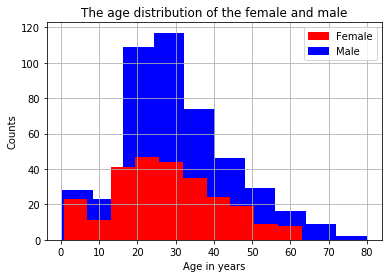

In [147]:
import matplotlib.patches as mpatches
%matplotlib inline
plt.xlabel("Age in years")
plt.ylabel("Counts")
plt.title("The age distribution of the female and male")
#plt.legend([male_df,female_df], ["FED"])
male_df.hist(label='Male',color='blue')
female_df.hist(color='red',label='Female')
red_patch = mpatches.Patch(color='red', label='Female')
Blue_patch = mpatches.Patch(color='blue', label='Male')
plt.legend(handles=[red_patch,Blue_patch])

## Regarding the mean of the age of the passenger, we had a similar distribution and close mean for the male and female. It kind of insight that it is a romantic ship
## Lets now investigate the question of "Did the age played a role in being a survival or not"

The age mean of the died passnegers=  30.6261792453
The age mean of the survived passengers=  28.3436896552


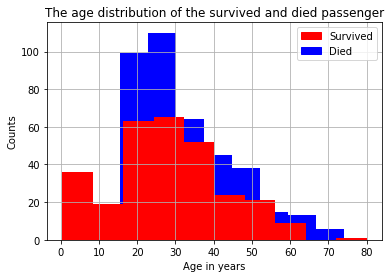

In [148]:
age_died.hist(label="Died",color='blue')
age_surv.hist(color='red')
plt.xlabel("Age in years")
plt.ylabel("Counts")
plt.title("The age distribution of the survived and died passenger")
print("The age mean of the died passnegers= ",age_died.mean())
print("The age mean of the survived passengers= ",age_surv.mean())
red_patch = mpatches.Patch(color='red', label='Survived')
Blue_patch = mpatches.Patch(color='blue', label='Died')
plt.legend(handles=[red_patch,Blue_patch])

In [134]:
###### Lets look as the tabel too
df.groupby("Survived").describe()

Age        Fare       Parch  PassengerId      Pclass  \
Survived                                                                      
0        count  424.000000  549.000000  549.000000   549.000000  549.000000   
         mean    30.626179   22.117887    0.329690   447.016393    2.531876   
         std     14.172110   31.388207    0.823166   260.640469    0.735805   
         min      1.000000    0.000000    0.000000     1.000000    1.000000   
         25%     21.000000    7.854200    0.000000   211.000000    2.000000   
         50%     28.000000   10.500000    0.000000   455.000000    3.000000   
         75%     39.000000   26.000000    0.000000   675.000000    3.000000   
         max     74.000000  263.000000    6.000000   891.000000    3.000000   
1        count  290.000000  342.000000  342.000000   342.000000  342.000000   
         mean    28.343690   48.395408    0.464912   444.368421    1.950292   
         std     14.950952   66.596998    0.771712   252.358840    0.863321   
         min      0.420000    0.000000    0.000000     2.000000    1.000000   
         25%     19.000000   12.475000    0.000000   250.750000    1.000000   
         50%     28.000000   26.000000    0.000000   439.500000    2.000000   
         75%     36.000000   57.000000    1.000000   651.500000    3.000000   
         max     80.000000  512.329200    5.000000   890.000000    3.000000   

                     SibSp  
Survived                    
0        count  549.000000  
         mean     0.553734  
         std      1.288399  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      8.000000  
1        count  342.000000  
         mean     0.473684  
         std      0.708688  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      4.000000


## One question was investigated  "Did the age played a role in being a survival or not", and passed on the results we didn't see any effect of the age on the survival of the passenger, the mean is very close to each other and looking at the distribution they both have similar distribution. 

### Lets practice dealing with numpy array

In [135]:
data=np.array(df['Age'])

In [136]:
##### lets remove the nan values from the numpy array data
data=data[~np.isnan(data)]

In [137]:
max_age=data.max()
min_age=data.min()

In [138]:
print('The maximum age of the passengers is',max_age)
print('The minimum age of the passengers is',min_age)

The maximum age of the passengers is 80.0
The minimum age of the passengers is 0.42


In [139]:
print('The mean age of the passengers',data.mean())

The mean age of the passengers 29.6991176471


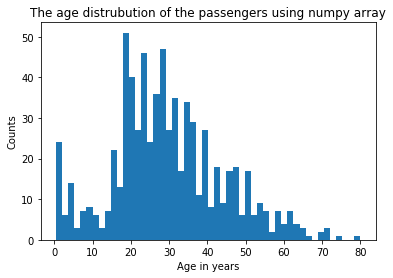

In [140]:
###### Lets plot the age distribution #######
plt.title('The age distrubution of the passengers using numpy array')
plt.xlabel("Age in years")
plt.ylabel("Counts")
plt.hist(data,50)
plt.show()

### We should be aware of the bias from the data we are using, since much number of the passenger didnt have the age data. So we can get an idea of the age distribution and mean but these are not the exact values as the bias from the sample we had and not the while population.